In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import roc_curve, classification_report, confusion_matrix
from xgboost import XGBClassifier

# 1. Load the DATA
The base data is already preprocessed(no missing values now, with 29 cols)

## 1.1 Deal with the categorical variables
To deal with the categorical variables, we can use the following methods:
- Label Encoding
- One-Hot Encoding

Then we need to standardize the data before feeding it to the model.

In [2]:
base = pd.read_csv('datasets/processed_base.csv')  # no missing values. dropped 3 cols
base

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,25.0,40,0.006735,AA,1059,13096.035018,7850.955007,...,9.0,0,1500.0,0,INTERNET,16.224843,linux,1,1.0,0
1,0,0.8,0.617426,89.0,20,0.010095,AD,1658,9223.283431,5745.251481,...,2.0,0,1500.0,0,INTERNET,3.363854,other,1,1.0,0
2,0,0.8,0.996707,14.0,40,0.012316,AB,1095,4471.472149,5471.988958,...,30.0,0,200.0,0,INTERNET,22.730559,windows,0,1.0,0
3,0,0.6,0.475100,14.0,30,0.006991,AB,3483,14431.993621,6755.344479,...,1.0,0,200.0,0,INTERNET,15.215816,linux,1,1.0,0
4,0,0.9,0.842307,29.0,40,5.742626,AA,2339,7601.511579,5124.046930,...,26.0,0,200.0,0,INTERNET,3.743048,other,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993602,0,0.8,0.124690,143.0,30,0.051348,AB,530,6732.602414,3010.048099,...,31.0,0,1500.0,0,INTERNET,16.967770,other,0,1.0,7
993603,0,0.9,0.824544,193.0,30,0.009591,AC,408,1574.293294,2716.495767,...,1.0,1,1000.0,0,INTERNET,1.504109,macintosh,0,1.0,7
993604,0,0.8,0.140891,202.0,10,0.059287,AA,749,1258.864938,3601.322892,...,31.0,0,200.0,0,INTERNET,16.068595,other,0,1.0,7
993605,0,0.9,0.002480,3.0,30,0.023357,AB,707,7048.137128,6521.395012,...,1.0,0,200.0,0,INTERNET,1.378683,linux,1,1.0,7


In [3]:
# labnel encoding
def label_encoding(data):
    # 需要进行Label Encoding的分类变量
    categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    # 创建 LabelEncoder 实例
    label_encoder = LabelEncoder()
    
    # 对每个分类变量进行 Label Encoding
    for feature in categorical_features:
        data[feature] = label_encoder.fit_transform(data[feature])
    
    return data

df = label_encoding(base)
df.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,25.0,40,0.006735,0,1059,13096.035018,7850.955007,...,9.0,0,1500.0,0,0,16.224843,0,1,1.0,0
1,0,0.8,0.617426,89.0,20,0.010095,3,1658,9223.283431,5745.251481,...,2.0,0,1500.0,0,0,3.363854,2,1,1.0,0
2,0,0.8,0.996707,14.0,40,0.012316,1,1095,4471.472149,5471.988958,...,30.0,0,200.0,0,0,22.730559,3,0,1.0,0
3,0,0.6,0.475100,14.0,30,0.006991,1,3483,14431.993621,6755.344479,...,1.0,0,200.0,0,0,15.215816,0,1,1.0,0
4,0,0.9,0.842307,29.0,40,5.742626,0,2339,7601.511579,5124.046930,...,26.0,0,200.0,0,0,3.743048,2,0,1.0,0


In [4]:
# one-hot encoding
def one_hot_encoding(data):
    # 需要进行One-Hot Encoding的分类变量
    categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    # 使用pd.get_dummies进行One-Hot Encoding
    # drop_first=True表示删除第一个类别，避免多重共线性,同时避免引入不必要的特征并且保留了所有信息
    # 此时先用False保留所有特征，后续建立模型时候可以选择drop_first=True来避免多重共线性并减少特征数量
    data_encoded = pd.get_dummies(data, columns=categorical_features,drop_first=True)
    
    # 找出新生成的 One-Hot 编码列
    encoded_columns = data_encoded.columns.difference(data.columns)
    
    # 将 One-Hot 编码列转换为整数类型
    data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)
    
    return data_encoded

# 示例预处理
df = one_hot_encoding(base)
df.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_2,housing_status_3,housing_status_4,housing_status_5,housing_status_6,source_1,device_os_1,device_os_2,device_os_3,device_os_4
0,0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,...,1,0,0,0,0,0,0,0,0,0
1,0,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,...,1,0,0,0,0,0,0,1,0,0
2,0,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,...,1,0,0,0,0,0,0,0,1,0
3,0,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,...,1,0,0,0,0,0,0,0,0,0
4,0,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,...,1,0,0,0,0,0,0,1,0,0


## 1.2 Scaling and Train-Test Split

In [4]:
# train test split
X = df.drop(columns='fraud_bool')
y = df['fraud_bool']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [5]:
# 筛选出二进制特征
binary_features_name = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

binary_features = df[binary_features_name]

# 列出所有的数值型特征
# numeric_features_name = df.select_dtypes(include=['number']).columns.tolist()
# 去掉二进制特征
# numeric_features_name = [col for col in numeric_features_name if col not in binary_features_name]

numeric_features_name=[x for x in df.columns if df[x].nunique() >= 10]

numeric_features = df[numeric_features_name]

In [6]:
# 创建 MinMaxScaler 实例
numeric_transformer = MinMaxScaler()

# 创建 ColumnTransformer
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features_name)], remainder='passthrough')

# 在训练集上拟合并转换
x_train_scaled = preprocessor.fit_transform(x_train)

# 仅转换测试集
x_test_scaled = preprocessor.transform(x_test)

# 获取列的顺序(colmuntransformer会改变列的顺序)
new_columns = numeric_features_name + [col for col in x_train.columns if col not in numeric_features_name]

# 转换后的结果通常为 NumPy 数组，将其转换回 DataFrame 并保持列名一致性
x_train_scaled = pd.DataFrame(x_train_scaled, columns=new_columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=new_columns)

In [7]:
# 确定分类特征的名称
categorical_features_name = [col for col in x_train_scaled.columns if 2 <= x_train_scaled[col].nunique() < 10]

# 确定分类特征的索引
all_features = list(x_train_scaled.columns)  # 所有特征的名称列表
categorical_feature_indices = [i for i, feature in enumerate(all_features) if feature in categorical_features_name]

print("分类特征名称：", categorical_features_name)
print("分类特征索引：", categorical_feature_indices)

分类特征名称： ['income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'month']
分类特征索引： [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


# 2. Get the functions for training

## 2.1 Define the `train_classifier` function
### `train_classifier` 函数的流程

1. **接受参数**：
    - 分类器实例 (`classifier`)。
    - 超参数分布 (`param_dist`)。
    - 训练特征数据 (`X_train`)。
    - 训练目标数据 (`y_train`)。
    - 编码后的分类特征列表 (`encoded_features`)。
    - 超参数搜索类型 (`search_type`)，默认为随机搜索。

2. **定义 `SMOTENC`**：
    - 使用 `SMOTENC` 来处理类别不平衡问题，只对训练集进行少数类过采样。

3. **创建流水线**：
    - 定义一个包含 `SMOTENC`和分类器的流水线。

4. **定义交叉验证策略**：
    - 使用 `StratifiedKFold` 来确保每个折中的类别分布与原始数据一致。

5. **超参数搜索**：
    - 根据指定的 `search_type` 执行随机搜索 (`RandomizedSearchCV`) 或网格搜索 (`GridSearchCV`)。
    - 搜索过程中使用指定的评估标准 (`scoring`)，如 `roc_auc`、`f1` 等。

6. **拟合模型并返回**：
    - 使用训练数据拟合模型，并返回经过交叉验证优化后的模型。

### 交叉验证中的细节

在交叉验证过程中，数据集被分为多个折，每个折包含训练集和验证集。具体步骤如下：

1. **数据分割**：
    - 将数据集分为 5 个折，每次使用其中的 4 个折作为训练集，1 个折作为验证集。这个过程重复 5 次，使得每个折都有一次作为验证集。

2. **应用 `SMOTENC` **：
    - 在每个折的训练集上应用 `SMOTENC` 进行少数类过采样。

3. **模型训练和验证**：
    - 使用过采样和标准化后的训练集来训练模型。
    - 使用验证集评估模型性能（根据 `scoring` 指定的评估标准）。

4. **超参数搜索**：
    - 在整个交叉验证过程中，使用 `RandomizedSearchCV` 或 `GridSearchCV` 来进行超参数搜索，优化模型性能。




- 先将训练集划分为多个折（训练集和验证集）。
- 只对训练集进行 `SMOTENC` 过采样和标准化处理。
- 在处理后的训练集上训练模型，并在验证集上评估模型性能。
- 通过交叉验证和超参数搜索优化模型，确保过采样和标准化发生在数据划分之后，从而避免数据泄漏和过拟合问题。

In [11]:
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random'):
    """
    Train a classifier using SMOTENC, StandardScaler and hyperparameter search.
    :param classifier
    :param param_dist(dict): The distribution of parameters to search over.
    :param X_train: Features in train set
    :param y_train: Target in train set
    :param encoded_features: List of categorical features that were encoded
    :param search_type: random or grid
    :return: a trained classifier
    """
    
    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
        
    # Create pipeline with SMOTENC, StandardScaler and the classifier
    pipeline = make_pipeline(smote_nc, classifier)
    
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                      param_distributions=param_dist,
                                      n_iter=10,
                                      scoring="roc_auc",
                                      n_jobs=-1,
                                      cv=cv)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring="roc_auc",
                                 n_jobs=-1,
                                 cv=cv)
    else:
        raise ValueError('search_type must be either "random" or "grid"')
        
    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv

In [8]:
from sklearn.metrics import make_scorer, f1_score

# 使用numpy进行内存优化
def train_classifier(classifier, param_dist, X_train, y_train, encoded_features, search_type='random', scoring='roc_auc'):
    """
    Train a classifier using SMOTENC, StandardScaler and hyperparameter search.
    :param classifier
    :param param_dist(dict): The distribution of parameters to search over.
    :param X_train: Features in train set
    :param y_train: Target in train set
    :param encoded_features: List of categorical features that were encoded
    :param search_type: random or grid
    :param scoring: Metric for model evaluation; 如果传入f1，则使用f1_score作为评估指标，否则使用传入的评估指标
    :return: a trained classifier
    """
    
    # Convert to numpy arrays and ensure efficient data types
    X_train = np.array(X_train).astype(np.float32)
    y_train = np.array(y_train).astype(np.int32)
    
    # Apply SMOTENC to deal with imbalanced classes
    smote_nc = SMOTENC(categorical_features=encoded_features, sampling_strategy='minority', random_state=42)
        
    # Create pipeline with SMOTENC and the classifier
    pipeline = make_pipeline(smote_nc, classifier)
    
    # Define cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Choose scoring method
    if scoring == 'f1':
        scoring_method = make_scorer(f1_score, pos_label=1) # pos_label=1 表示正类标签为1
    else:
        scoring_method = scoring
    
    # Perform hyperparameter search
    if search_type == 'random':
        search_cv = RandomizedSearchCV(estimator=pipeline, 
                                      param_distributions=param_dist,
                                      n_iter=20,
                                      scoring=scoring_method,
                                      n_jobs=-1,
                                      cv=cv,
                                      verbose=2)
    elif search_type == 'grid':
        search_cv = GridSearchCV(estimator=pipeline,
                                 param_grid=param_dist,
                                 scoring=scoring_method,
                                 n_jobs=-1,
                                 cv=cv,
                                 verbose=2)
    else:
        raise ValueError('search_type must be either "random" or "grid"')
        
    # Fit the model and return the trained classifier
    search_cv.fit(X_train, y_train)

    return search_cv

## 2.2 Define the Evaluate function

函数 evaluate_classifier 用于全面评估二分类器，帮助理解模型在默认阈值和目标阈值下的表现，并通过 ROC 曲线、分类报告和混淆矩阵进行可视化。

In [9]:
# print classification report
def print_cls_report(y_test, y_pred, title="Classification Report"):
    report = classification_report(y_test, y_pred, output_dict=True)
    recall = report["1"]["recall"]
    print(f"{title}:\n", classification_report(y_test, y_pred))
    return recall

# plot confusion matrix
def plot_con_matrix(ax, y_test, y_pred, title="Confusion Matrix"):
    matrix = confusion_matrix(y_test, y_pred)
    ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(x=j, y=i, s=matrix[i, j], va='center', ha='center')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    return matrix

# evaluate the classifier on test set 
def evaluate_classifier(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    target_fpr = 0.05 # set the target threshold 
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    
    y_pred_threshold = (y_prob >= threshold).astype(int)
    
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    plt.tight_layout()
    plt.show()

    return fpr, tpr, default_recall, target_recall

# 3. Modeling and Evaluation
## 3.1 Logistic Classifier

In [ ]:
# 超参数分布示例
param_dist = {
    'logisticregression__C': [ 0.1, 1, 10],
    'logisticregression__solver': ['sag', 'lbfgs']
}

# 调用函数训练逻辑回归模型
best_model = train_classifier(
    classifier=LogisticRegression(), 
    param_dist=param_dist, 
    X_train=x_train_scaled, 
    y_train=y_train, 
    encoded_features=categorical_feature_indices,
)

print("Best Logistic Regression Model:", best_model.best_estimator_)

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## 3.2 XGBoost Classifier

In [ ]:
# 超参数分布示例
param_dist = {
    'xgbclassifier__n_estimators': [100, 50,150],
    'xgbclassifier__max_depth': [ 5, 7],
    'xgbclassifier__learning_rate': [ 0.1, 0.5],
}

# 调用函数训练XGBoost模型
best_model = train_classifier(
    classifier=XGBClassifier(tree_method='gpu_hist'), 
    param_dist=param_dist, 
    X_train=x_train_scaled, 
    y_train=y_train, 
    encoded_features=categorical_feature_indices,
    search_type='random',
    scoring='f1'
)

print("Best XGBoost Model:", best_model.best_estimator_)

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [19]:
y_train_pred=best_model.predict(x_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    786082
           1       0.09      0.44      0.14      8803

    accuracy                           0.94    794885
   macro avg       0.54      0.69      0.56    794885
weighted avg       0.98      0.94      0.96    794885



Default Threshold:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    196530
           1       0.09      0.45      0.15      2192

    accuracy                           0.94    198722
   macro avg       0.54      0.70      0.56    198722
weighted avg       0.98      0.94      0.96    198722

Target Threshold @ 0.52:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97    196530
           1       0.09      0.44      0.15      2192

    accuracy                           0.94    198722
   macro avg       0.54      0.69      0.56    198722
weighted avg       0.98      0.94      0.96    198722



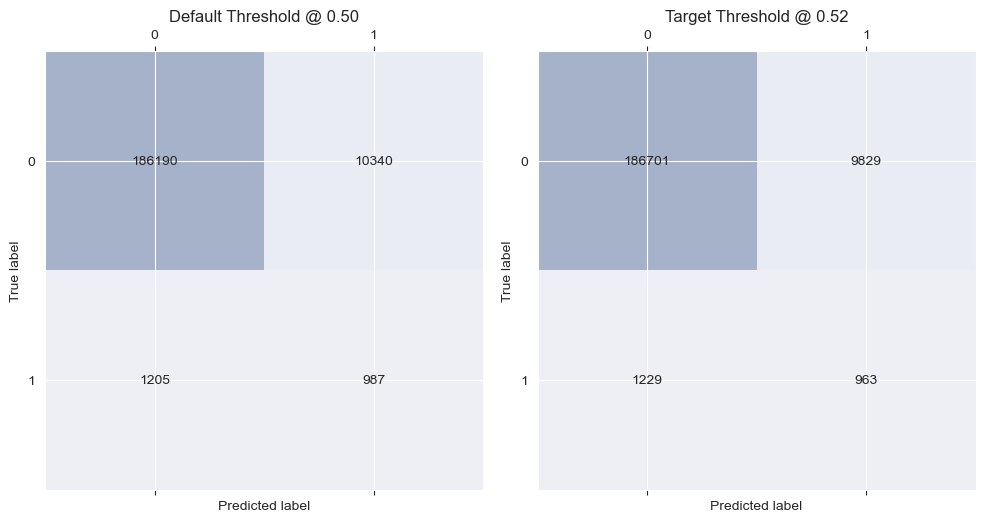

(array([0.00000000e+00, 5.08828169e-06, 1.01765634e-05, ...,
        9.93965298e-01, 9.93975474e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 0.45027372262773724,
 0.4393248175182482)

In [20]:
evaluate_classifier(best_model, x_test_scaled, y_test)